In [2]:
import torch
from PIL import Image
import open_clip

In [ ]:
# model, _, preprocess = open_clip.create_model_from_pretrained()
model, _, preprocess = open_clip.create_model_and_transforms("ViT-B-32", pretrained="laion2b_s34b_b79k")
model.eval()
tokenizer = open_clip.get_tokenizer('ViT-B-32')

In [25]:

raw = Image.open('../datasets2/unet/129420.jpg')
image = preprocess(raw).unsqueeze(0)
text = tokenizer(["a woman", "white guy", "black guy", "middle aged asian guy in a suit"])

with torch.no_grad():
    images_features = model.encode_image(image)
    text_features = model.encode_text(text)
    print(images_features.shape)
    images_features /= images_features.norm(dim=-1, keepdim=True)
    text_features /= text_features.norm(dim=-1, keepdim=True)

    values = images_features @ text_features.T

values

torch.Size([1, 512])


tensor([[0.1406, 0.1520, 0.1155, 0.2995]])

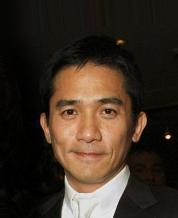

In [21]:
raw